In [1]:
!pwd
from SYK_fft import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from ConformalAnalytical import *

/Users/aravindhswaminathan/Documents/GitHub/TwoSidedYSYK


# Revival Dynamics in a traversable wormhole
2 copies of Majorana syk, $\mu$ is a real number that couples the 2 sides. 
\begin{align}
G_{+}(i\omega_n) &= \left[ i\omega_n - \mu - \Sigma_+(i\omega_n) \right]^{-1} \\
\Sigma_+(\tau) &= -\frac{1}{4}J^2\left[3G_+^2(\tau)G_+(-\tau) + G_+^3(-\tau)\right]
\end{align}

### HINDSIGHT: 
From the solution, we note that the cross coupling $\mu$ is renormalized away in the IR solution and the scaling at low frequencies is exactly that of majorana SYK. However, the fact that it enters the Schwinger-Dyson equations like a chemical potential leaves its mark on the total charge, which is seen as the discontinuity of the green's function at $\tau = 0$.

In [2]:
Nbig = int(2**20)
err = 1e-3

beta = 5000
#mu = 0.001
mu = 0.000
J = 0.5

omega = (2 * np.arange(Nbig) - Nbig + 1) * np.pi/beta
tau = (np.arange(Nbig) + 1./2) * beta/Nbig

In [3]:
#GDtau = Time2FreqF(GconfImag(omega,g,beta),Nbig,beta)
GDtau = -np.ones(Nbig)

itern = 0
diff = 1
x = 0.5
xGD = 0.5
diffGD = 1.

while(diff>err):
    itern+=1
    diffoldGD = diffGD
    
    oldGDtau = 1.0*GDtau
    oldGDomega = Time2FreqF(oldGDtau,Nbig,beta)

    SigmaDtau = 0.25 * (J**2) * (3*(GDtau**2)*GDtau[::-1] + GDtau[::-1]**3)
    SigmaDomega = Time2FreqF(SigmaDtau,Nbig,beta)
    
    GDomega = xGD*(1./(1j*omega - mu - SigmaDomega)) + (1-xGD)*oldGDomega
    
    
    GDtau = Freq2TimeF(GDomega - 1/(1j*omega),Nbig,beta) - 0.5
    #GDtau = Freq2TimeF(GDomega,Nbig,beta) 
    
    diffGD = np. sqrt((1.0/Nbig) * np.sum((np.abs(GDtau-oldGDtau))**2))
    diff = diffGD
    
    if diffGD>diffoldGD:
        xGD/=2.

    print("itern = ",itern, " , diff = ", diffGD, end = '\r')

Q = GDtau[0] - GDtau[-1]

Q = 0.00-0.00j


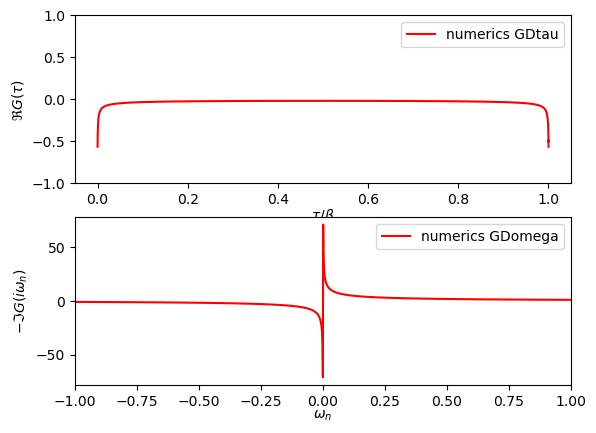

In [4]:
fig, (ax1,ax2) = plt.subplots(2)
print(f'Q = {Q:.2f}')

ax1.plot(tau/beta, np.real(GDtau), 'r', label = 'numerics GDtau')
ax1.set_ylim(-1,1)
ax1.set_xlabel(r'$\tau/\beta$',labelpad = 0)
ax1.set_ylabel(r'$\Re{G(\tau)}$')
ax1.legend()

ax2.plot(omega,-np.imag(GDomega), 'r', label = 'numerics GDomega')
ax2.set_xlim(-1,1)
ax2.set_xlabel(r'$\omega_n$', labelpad=0)
ax2.set_ylabel(r'$-\Im{G(i\omega_n)}$')
ax2.legend()

slope of fit = -0.493


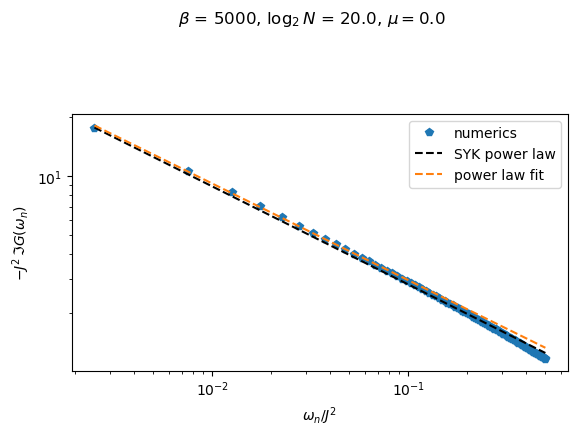

In [5]:
start, stop = Nbig//2, Nbig//2 + 100
#delta = 0.420374134464041
#delta = 0.116902
delta = 0.25

fitGD_val = -np.imag(GDomega[start])*(J**2)
conf_fit_GD = 1 * np.abs(omega/(J**2))**(2*delta - 1)
conf_fit_GD = conf_fit_GD/conf_fit_GD[start] * fitGD_val



fitslice = slice(start, start + 15)
m,c = np.polyfit(np.log(omega[fitslice]/J**2), np.log(-np.imag(GDomega[fitslice])*(J**2)),1)
print(f'slope of fit = {m:.03f}')

fig, ax1 = plt.subplots(1)
#fig.set_figwidth(10)
titlestring = r'$\beta$ = ' + str(beta) + r', $\log_2{N}$ = ' + str(np.log2(Nbig)) + r', $\mu = $' + str(mu)
fig.suptitle(titlestring)
#fig.tight_layout(pad=2)

ax1.loglog(omega[start:stop]/(J**2), -np.imag(GDomega[start:stop])*(J**2),'p',label = 'numerics')
ax1.loglog(omega[start:stop]/(J**2), conf_fit_GD[start:stop],'k--',label = 'SYK power law')
ax1.loglog(omega[start:stop]/(J**2), np.exp(c)*(omega[start:stop]/(J**2))**m, '--', label = 'power law fit')

ax1.set_xlabel(r'$\omega_n/J^2$')
ax1.set_ylabel(r'$-J^2\,\Im{G(\omega_n)}$')
ax1.set_aspect('equal', adjustable='box')
#ax1.axis('square')
ax1.legend()


In [6]:
np.imag(GDomega[fitslice])

array([-70.92860115, -42.74476636, -33.26782149, -28.13819481,
       -24.81468384, -22.43385685, -20.61840778, -19.17447963,
       -17.99050477, -16.99686924, -16.14749525, -15.41049031,
       -14.76299165, -14.18813558, -13.67318375])